In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#reading data which is csv file in this case and saving in df which will be dataframe, 
#inside "" is directory in which csv file is in
df = pd.read_csv("C:\\Users\\harsh\\Downloads\\netflix1.csv\\netflix1.csv")

In [3]:
#checking how many rows and columns the dataset is
print('number of rows: ', len(df.axes[0]))
print('number of columns: ', len(df.axes[1]))


number of rows:  8790
number of columns:  10


In [4]:
#how data looks like:
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [5]:
#more info on data
df.info()
#Things to clean,
#1)date_added column is object type: changing it to datetime dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
#seeing if there are any duplicate values in df
df.duplicated().value_counts()

False    8790
dtype: int64

In [7]:
#seeing if I can use groupby to sort tv shows and movies based on their duration:
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


In [8]:
#2)things to clean:
#for a given duration, there are 2 kinds of values: Seasons and minutes, I need to filter out 
#int values in these elements.

#upon furthur inspection, I found that seasons are for duration of tv_series
#and minutes for movies.

#3)So, I need to first separate the df into 2: one with tv_series and other one
#with movies.then I can separate their duration that is mins and seasons

#I'll create a copy of df and try to clean the copy:
df_clean = df.copy()

In [9]:

df_clean.head()
#4)there are multiple genre per row in listed_in in some cases, these genres are repeating values in the rows
#for ease of looking and analysis, ill convert the rows having multiple genres into 3 seperate columns,
#namely genre column 1, 2 and 3. i will disregard the rest and consider only the starting 3 genres as top 3
#genres for that tv series or movie.

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [10]:
#ANS1)this .to_datetime will convert date_added column to datetime dtype
df_clean.date_added = pd.to_datetime(df_clean.date_added)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [12]:
#ans 4) for seperating genres, I will iterate through every row in listed_in column and 
#and will select out the 3 genres ( if there are 3) to 3 different columns
#make 3 seperate columns for top 3 genres
#creating 3 seperate columns:
df_clean['listed_in1'] = 0
df_clean['listed_in2'] = 0
df_clean['listed_in3'] = 0
#temp_cat will denote which row we are in out of 8790 rows
temp_cat = df_clean.listed_in.str.split(',')
i=0
for i in range (8790):
    t_cat = temp_cat[i]
    #if there is only one genre
    if len(t_cat) == 1:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = 0
        df_clean['listed_in3'][i] = 0
    #if there are two genres
    if len(t_cat) == 2:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = 0
    #if there are 3 genres
    if len(t_cat) == 3:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = temp_cat[i][2]

C:\Users\harsh\AppData\Local\Temp\ipykernel_18532\3601912366.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in1'][i] = temp_cat[i][0]
C:\Users\harsh\AppData\Local\Temp\ipykernel_18532\3601912366.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in2'][i] = 0
C:\Users\harsh\AppData\Local\Temp\ipykernel_18532\3601912366.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in3'][i

In [13]:
df_clean
#this represents df with 3 seperate columns for 3 genres

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0


In [14]:
#ANS 3) creating df_tv and df_movies to seperate out df_clean into 2 dfs based on tv show or movie 
df_tv = df_clean[df_clean.type == 'TV Show']
df_movie = df_clean[df_clean.type == 'Movie']

In [15]:
df_tv.head(50)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries
20,s4832,TV Show,True: Magical Friends,"Mark Thornton, Todd Kauffman",United States,2018-06-15,2018,TV-Y,1 Season,Kids' TV,Kids' TV,0,0
21,s4833,TV Show,True: Wonderful Wishes,"Mark Thornton, Todd Kauffman",United States,2018-06-15,2018,TV-Y,1 Season,Kids' TV,Kids' TV,0,0
22,s4857,TV Show,Dance & Sing with True,"Mark Thornton, Todd Kauffman",United States,2018-05-18,2018,TV-Y,1 Season,Kids' TV,Kids' TV,0,0
24,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Not Given,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
27,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,United States,2021-09-22,2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...",Crime TV Shows,Docuseries,International TV Shows


In [16]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals


In [17]:
#ANS2)create a column named df_tv.duration_seasons.
#first we will split the values in duration column at ' ' and 
# will store a list of all sub-values that are splitted with ' '
#and then chose the very first value out of these sub values in any row
temp_dur = df_tv.duration.str.split(' ',expand=True)
df_tv['duration_seasons'] = temp_dur[0]
df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)

C:\Users\harsh\AppData\Local\Temp\ipykernel_18532\150595767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration_seasons'] = temp_dur[0]
C:\Users\harsh\AppData\Local\Temp\ipykernel_18532\150595767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)


In [18]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries,1


In [19]:
#same for movie
temp_dur = df_movie.duration.str.split(' ',expand=True)
df_movie['duration_minutes'] = temp_dur[0]
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)

C:\Users\harsh\AppData\Local\Temp\ipykernel_18532\3717000387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = temp_dur[0]
C:\Users\harsh\AppData\Local\Temp\ipykernel_18532\3717000387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)


In [20]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,125
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0,104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals,87


In [21]:
#we created 3 database from the original one, ill save all these 3
df_clean.to_csv('Netflix_DF_clean.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

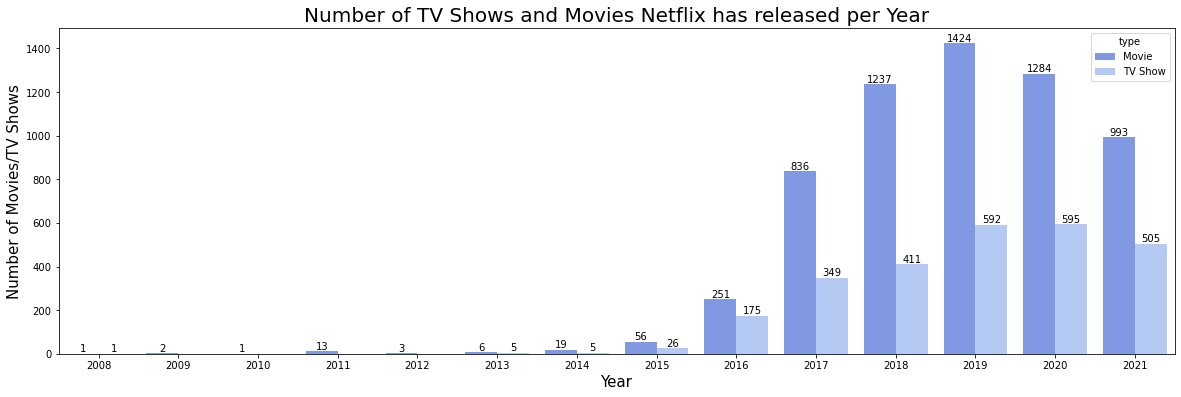

In [22]:
#Suppose we wanted to know what kind of media has been produced in netflix per year (movie and tvshow)
#specifying the size of chart
plt.figure(figsize=[20,6])
#specifying color with seaborn
base_color = sns.color_palette('coolwarm',n_colors=5)
#showing counts of dates in form of bar and setting up color that is in base_color, setting 
#hue as 'type' because we wanna know number of --tvshows or movies-- per year.
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data=df_clean, hue='type', palette = base_color)
#title
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
#x & Y axis name
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)
for container in tv_movie.containers:
    tv_movie.bar_label(container)

In [23]:
#Inference --> more movies than tv show every year, there is increasing number of media till 2019 then
#gradual decrline possibly because of COVID
df_clean.date_added.dt.year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8785    2017
8786    2018
8787    2016
8788    2018
8789    2018
Name: date_added, Length: 8790, dtype: int64

In [24]:
df_clean.date_added.dt.year.count()

8790

In [25]:
len(df_tv.groupby('country').count().index)

59

In [26]:
df_tv.head()
#Q2)suppose Rajiv from pakistan is looking for tvseries from pakistan.
#he is only looking for series to bingewatch(series having 4 or more seasons)
# and only TV-14 or TV-MA rating movies
#country - pakistan
# duration_seasons >= 4

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries,1


In [27]:
df_tv.rating.unique()
#df_tv.listed_in1.unique()

array(['TV-MA', 'TV-14', 'TV-Y', 'TV-Y7', 'TV-PG', 'TV-G', 'R', 'NR',
       'TV-Y7-FV'], dtype=object)

In [28]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 1 to 8789
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           2664 non-null   object        
 1   type              2664 non-null   object        
 2   title             2664 non-null   object        
 3   director          2664 non-null   object        
 4   country           2664 non-null   object        
 5   date_added        2664 non-null   datetime64[ns]
 6   release_year      2664 non-null   int64         
 7   rating            2664 non-null   object        
 8   duration          2664 non-null   object        
 9   listed_in         2664 non-null   object        
 10  listed_in1        2664 non-null   object        
 11  listed_in2        2664 non-null   object        
 12  listed_in3        2664 non-null   object        
 13  duration_seasons  2664 non-null   int64         
dtypes: datetime64[ns](1), in

In [29]:
pakistani_tv_shows = df_tv.loc[(df_tv['country']== 'Pakistan') & (df_tv['duration_seasons'] >= 4) ]
pakistani_tv_shows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_seasons
41,s90,TV Show,Mighty Raju,Not Given,Pakistan,2021-09-09,2017,TV-Y7,4 Seasons,Kids' TV,Kids' TV,0,0,4
97,s337,TV Show,Friday Night Lights,Not Given,Pakistan,2021-08-01,2010,TV-14,5 Seasons,"TV Dramas, Teen TV Shows",TV Dramas,Teen TV Shows,0,5
194,s1236,TV Show,Pokémon Journeys: The Series,Not Given,Pakistan,2021-03-05,2021,TV-Y7,4 Seasons,"Anime Series, Kids' TV, TV Action & Adventure",Anime Series,Kids' TV,TV Action & Adventure,4
550,s6507,TV Show,Club Friday The Series 8,Not Given,Pakistan,2019-02-02,2017,TV-MA,8 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Comedies,8
551,s6505,TV Show,Club Friday The Series 6,Not Given,Pakistan,2019-03-09,2015,TV-MA,9 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas,9
552,s6506,TV Show,Club Friday The Series 7,Not Given,Pakistan,2018-06-18,2016,TV-MA,7 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas,7


In [30]:
pakistani_tv_shows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_seasons
41,s90,TV Show,Mighty Raju,Not Given,Pakistan,2021-09-09,2017,TV-Y7,4 Seasons,Kids' TV,Kids' TV,0,0,4
97,s337,TV Show,Friday Night Lights,Not Given,Pakistan,2021-08-01,2010,TV-14,5 Seasons,"TV Dramas, Teen TV Shows",TV Dramas,Teen TV Shows,0,5
194,s1236,TV Show,Pokémon Journeys: The Series,Not Given,Pakistan,2021-03-05,2021,TV-Y7,4 Seasons,"Anime Series, Kids' TV, TV Action & Adventure",Anime Series,Kids' TV,TV Action & Adventure,4
550,s6507,TV Show,Club Friday The Series 8,Not Given,Pakistan,2019-02-02,2017,TV-MA,8 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Comedies,8
551,s6505,TV Show,Club Friday The Series 6,Not Given,Pakistan,2019-03-09,2015,TV-MA,9 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas,9
552,s6506,TV Show,Club Friday The Series 7,Not Given,Pakistan,2018-06-18,2016,TV-MA,7 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas,7


In [31]:
pakistani_tv_shows['title']

41                      Mighty Raju
97              Friday Night Lights
194    Pokémon Journeys: The Series
550        Club Friday The Series 8
551        Club Friday The Series 6
552        Club Friday The Series 7
Name: title, dtype: object

In [33]:

pakistani_tv_shows.to_csv('2nd_outputpakistani_tv_show.csv')